In [1]:
#all imports required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log2 as log
%matplotlib inline

In [ ]:
df_ecommerce = pd.read_csv("E-Commerce Shipping_data.csv", index_col=0)
df_ecommerce

In [ ]:
df_ecommerce.info()

In [4]:
df_ecommerce.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Data Exploration zu Customer Rating:

In [16]:
df_ecommerce['Customer_rating'].describe()

#durchschnitt 2.99 mit hoher(?) standartabweichung von 1.4

count    10999.000000
mean         2.990545
std          1.413603
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Customer_rating, dtype: float64

In [ ]:
sns.displot(df_ecommerce['Customer_rating'])

#sagt uns garnix

Data Exploration zu Prior Purchases:

In [ ]:
df_ecommerce['Prior_purchases'].describe()

#durchschnitt 3.57 mit standartabweichung 1.52

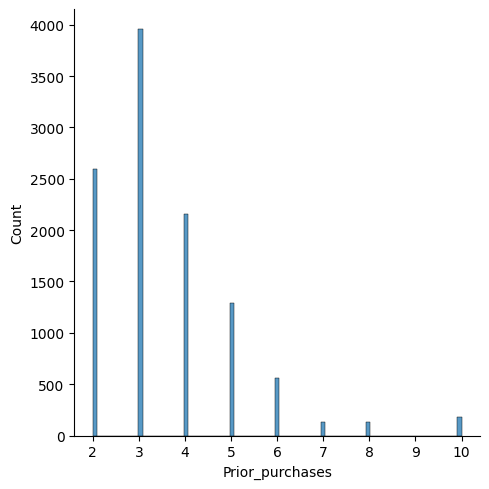

In [21]:
sns.displot(df_ecommerce['Prior_purchases'])

Data Exploration zu Customer Care Calls:

In [ ]:
df_ecommerce['Customer_care_calls'].describe()

# durchschnitt 4.05 mit standartabweichung 1.14

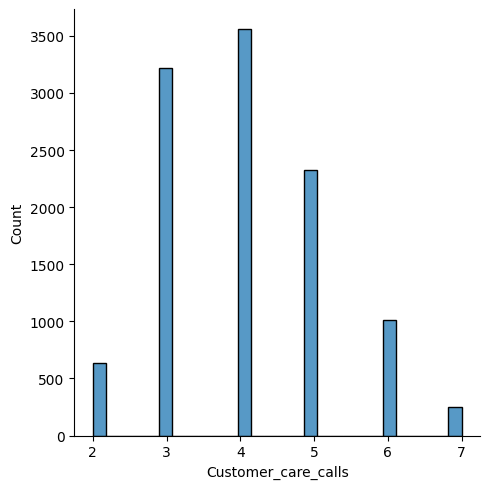

In [31]:
sns.displot(df_ecommerce['Customer_care_calls'])

Data Exploration zu Cost of Product:

In [ ]:
df_ecommerce['Cost_of_the_Product'].describe()

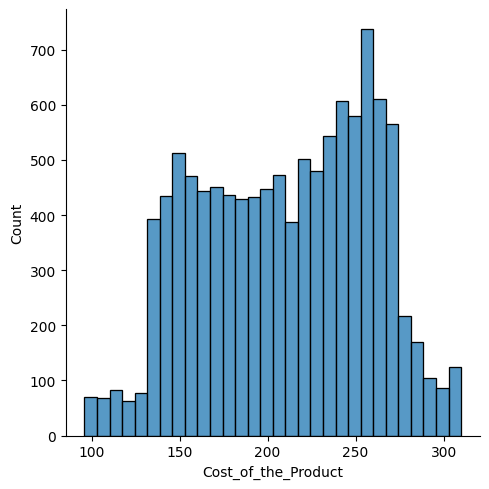

In [22]:
sns.displot(df_ecommerce['Cost_of_the_Product'])

Korrelation zwischen Customer Rating und Cost of Product:

(-0.5, 214.5, 0.0, 6.0)

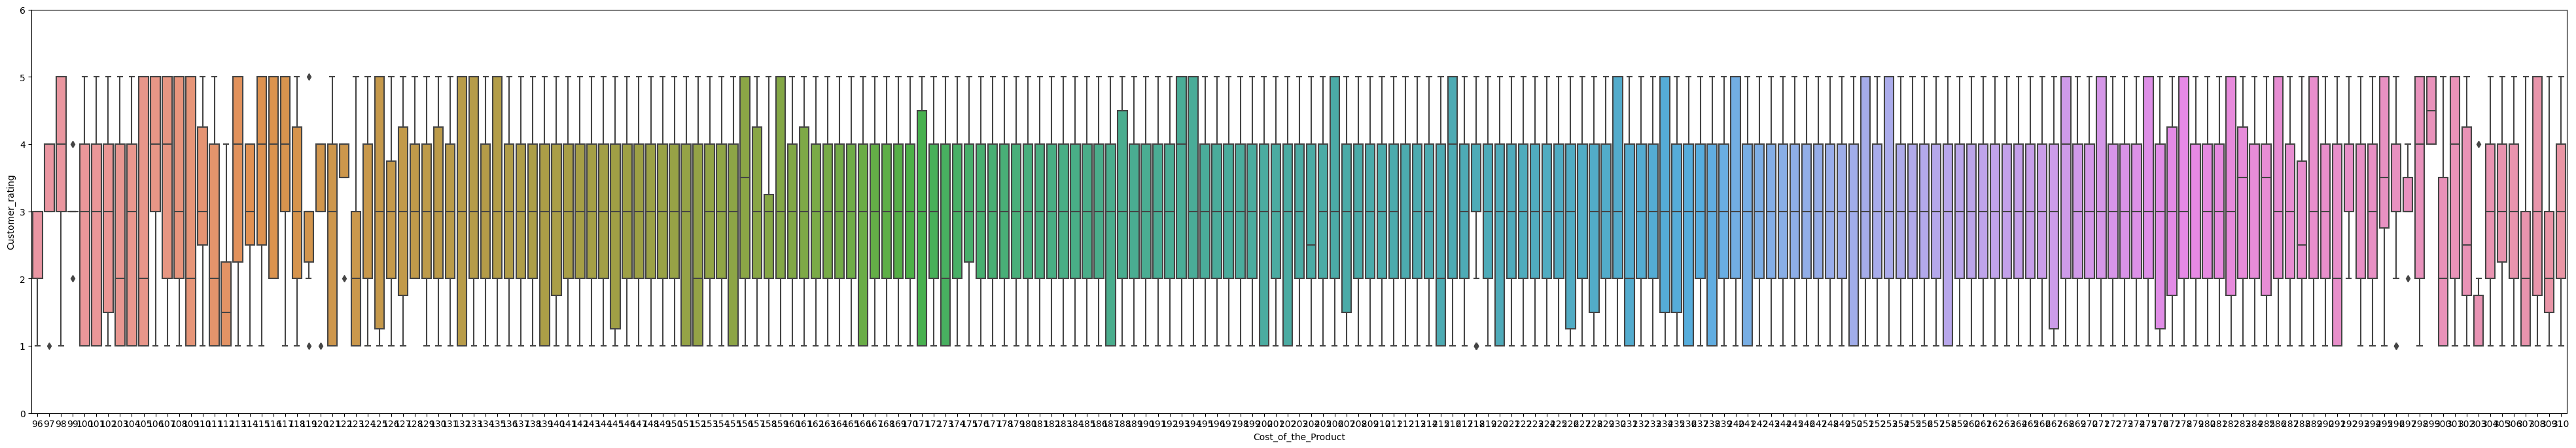

In [29]:
cost = 'Cost_of_the_Product'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[cost], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(50, 8))
fig = sns.boxplot(x=cost, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

# korreliert nicht

Korrelation zwischen Customer Rating und Customer Calls

In [ ]:
#correlation matrix
corrmat = df_ecommerce.corr(numeric_only=float)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)